<a href="https://colab.research.google.com/github/AKMADOU/PCA/blob/main/ADOU_Kouam%C3%A9_Mathurin__PCA_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
############################################################################################

The goal: is to apply the PCA on the data to reduce its dimension from 4 to 2.

Apply the PCA algorithm using numpy, here is a summary of the steps:

- Data preprocessing: mean normalization/feature scaling.

- find the covariance matrix (sigma).

- Compute the eigen vectors and eigen values of sigma.

- select k eigen vectors that with the highest variances.

- Transform the data x to the new reduced plane z; 

  z(n,k) = normalized_x(n,d).T * reduced_eigen_vec_matrix(d,k)

In [ ]:
df = pd.read_csv('/content/Data (1).csv')
df.head()

,f1,f2,f3,f4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
def PCA(df, k):
  x = np.array(df)

  # step 1: calculate the Mean normalization of x
  X_Mean=x - np.mean(x , axis = 0)

  # step 2: calculate covariance matrix from the normalized_x
  # make the parameter rowvar = False; check the documentation of np.cov to see why..
  cov = np.cov(X_Mean , rowvar = False)
  # print(cov)

  # step 3: compute the eigen values and eigen vectors
 
  eigen_values , eigen_vectors = np.linalg.eig(cov)
  print("eigen_values:",eigen_values)
  print("-"*928)
  print("eigen_vectors:",eigen_vectors)

  # step 4: sort the eigen values in "descending" order, then use this sorted indicies to sort the eigen vectors.
  #sort the eigenvalues 
  sort_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sort_index]
  # sort the eigenvectors 
  sorted_eigenvectors = eigen_vectors[:,sort_index]
  # step 5: select k eigen vectors
  eigenvector_select = sorted_eigenvectors[:,:k]
  # print(eigenvector_subset)

  # step 6: transform the data
  z=X_Mean@eigenvector_select
  

  return z

In [ ]:
k = 2 # reduce the data dimensionality to 2
z = PCA(df, k)
principal_df = pd.DataFrame(z, columns=['PC1', 'PC2'])
# principal_df.head()

eigen_values: [4.22824171 0.24267075 0.0782095  0.02383509]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
eigen_vecto

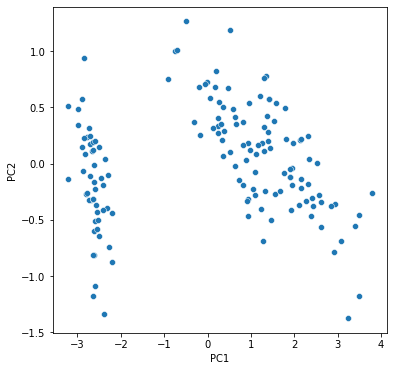

In [ ]:
# Visualize the result of PCA for 2 components
plt.figure(figsize = (6,6))
sb.scatterplot(data = principal_df , x = 'PC1',y = 'PC2')

In [ ]:
###################################################################